## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

## Load the data

In [2]:
data = pd.read_csv('USA_Students.csv')
print(data.describe())
X=data['SAT']
Y=data['GPA']
print(data.shape)
print(X.shape)

               SAT          IQ        GPA
count    84.000000   84.000000  84.000000
mean   1845.273810  111.928571   3.330238
std     104.530661    8.050721   0.271617
min    1634.000000   96.000000   2.400000
25%    1772.000000  106.000000   3.190000
50%    1846.000000  112.000000   3.380000
75%    1934.000000  119.000000   3.502500
max    2050.000000  128.000000   3.810000
(84, 3)
(84,)


## Plot the samples

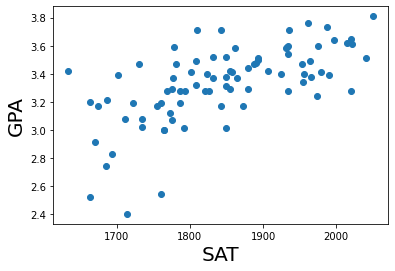

In [ ]:
plt.scatter(X, Y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Hyper-prameters

In [ ]:
L = 0.0000001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent
m=0
c=0
n = float(len(X)) # Number of elements in X

## Gradient Descent Algorithm

In [ ]:
for i in range(epochs):

    # Step 1 : Calculate YHAT
    Y_pred = m*X + c  # The current predicted value of Y
    
    # Step 2 : Get Gradients
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    
    # Step : Update
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

## Evaluation

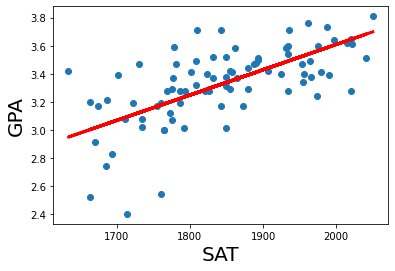

Mean Square Error 0.043539966469155686


In [ ]:
prediction=X*m+c
plt.scatter(X, Y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.plot(X, prediction, color='red', linewidth = 3)
plt.show()

print('Mean Square Error', metrics.mean_squared_error(Y, prediction))

## Prediction

In [ ]:
#Predict your GPA based on your SAT Score
STA_Score=int(input('Enter your SAT score: '))
y_test=m*STA_Score + c
print('Your predicted GPA is ' + str(float(y_test)))

Enter your SAT score: 1900
Your predicted GPA is 3.4281094590295123


# Exercise 3

## Feature Encoding

In [1]:
from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X

## Data preprocessing

       Age Nationality  Overall  Potential                 Club Position  \
0       31   Argentina       94         94         FC Barcelona       RF   
1       33    Portugal       94         94             Juventus       ST   
2       26      Brazil       92         93  Paris Saint-Germain       LW   
3       27       Spain       91         93    Manchester United       GK   
4       27     Belgium       91         92      Manchester City      RCM   
...    ...         ...      ...        ...                  ...      ...   
17950   19     England       47         65      Crewe Alexandra       CM   
17951   19      Sweden       47         63       Trelleborgs FF       ST   
17952   16     England       47         67     Cambridge United       ST   
17953   17     England       47         66      Tranmere Rovers       RW   
17954   16     England       46         66      Tranmere Rovers       CM   

       Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  Vision  \
0          84

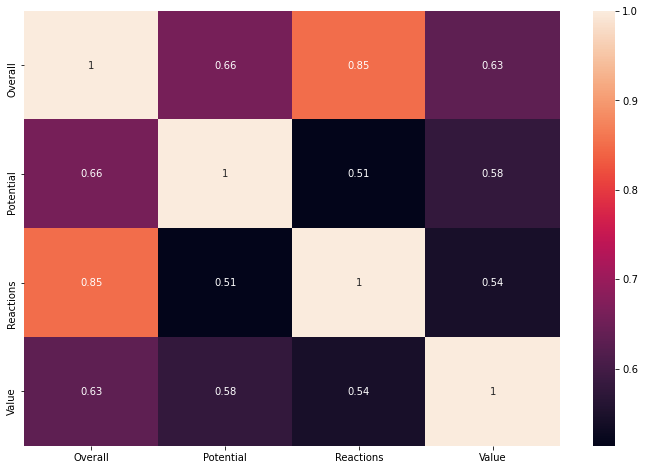

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Pre-processing
#Load players data
data = pd.read_csv('fifa19.csv')
#Drop the rows that contain missing values
data.dropna(how='any',inplace=True)
fifa_data=data.iloc[:,:]
X=data.iloc[:,1:40] #Features
print(X)
Y=data['Value'] #Label
cols=('Nationality','Club','Position')
X=Feature_Encoder(X,cols);

#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,shuffle=True)
#Get the correlation between the features
corr = fifa_data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']>0.5)]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = fifa_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## Multiple Linear Regression

In [11]:
cls = linear_model.LinearRegression()

L = 0.0000001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
m1=0
m2=0
m3=0
c=0
n = float(len(X_train)) # Number of elements in X
for i in range(epochs):
    # Student code
    Y_pred = m1*X['Overall'] + m2*X['Potential'] + m3*X['Reactions'] + c  # The current predicted value of Y
    D_m1 = (-2/n) * sum(X['Overall'] * (Y - Y_pred))  # Derivative w.r.t m1
    D_m2 =(-2/n) * sum(X['Potential'] * (Y - Y_pred))  # Derivative w.r.t m2
    D_m3=(-2/n) * sum(X['Reactions'] * (Y - Y_pred))  # Derivative w.r.t m3
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative w.r.t c
    
   
    
    # Student code
    m1 = m1 - L * D_m1  # Update m1
    m2 = m2 - L * D_m2  # Update m2
    m3 = m3 - L * D_m3  # Update m3
    c = c - L * D_c  # Update c

## Prediction

In [ ]:
prediction=np.array(X_test)[:,0]*m1+np.array(X_test)[:,1]*m2+np.array(X_test)[:,2]*m3+c

cls.fit(X_train,y_train)
prediction2= cls.predict(X_test)

print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(np.asarray(y_test), prediction))
print('Mean Square Error 2', metrics.mean_squared_error(np.asarray(y_test), prediction2))

true_player_value=np.asarray(y_test)[1]
predicted_player_value=prediction[1]

print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))

Co-efficient of linear regression [-2.94098695e-01 -1.01014571e-03  5.77360616e-01  5.11614053e-02
  3.70217484e-04 -8.37838640e-03 -6.63426373e-03  1.20879673e-02
 -1.50717876e-02 -1.24940333e-02  3.04740080e-02 -9.03089658e-03
 -1.17026011e-03  9.84070935e-03  1.00711153e-02 -4.64181959e-02
 -2.30298966e-03 -7.12641792e-03 -2.17769422e-02  6.12535591e-02
  1.03733564e-02 -1.89058373e-02  2.99547823e-04 -3.11036051e-03
 -1.01063979e-02 -1.68664423e-02 -7.30254807e-03 -6.61542912e-03
  1.16547920e-02  1.92422164e-02  3.22669310e-03  6.28038714e-03
  1.01091836e-02 -6.16173029e-03 -7.87207812e-04 -8.28390089e-03
 -3.51327400e-03 -1.05031197e-02 -2.80726822e-02]
Intercept of linear regression model -30.194312244746772
Mean Square Error 29.14849058733988
Mean Square Error 2 15.830496268090728
True value for the first player in the test set in millions is : 0.575
Predicted value for the first player in the test set in millions is : 2.344190996226067


## Polynomial Regression

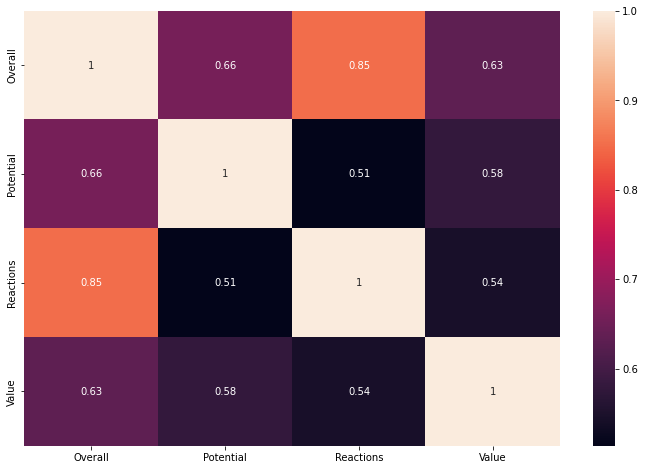

Co-efficient of linear regression [ 2.50189658e-12  3.78630569e+00  4.64464143e-03 -5.79539748e+00
 -2.39608551e-02  4.37296308e-03  1.24955430e-01 -3.43120744e-02
 -2.12869210e-01  1.25460993e-02 -3.12279410e-02 -1.98854033e-01
  2.93254116e-01  1.17649756e-01 -3.91292605e-01 -4.78464725e-02
  1.10642099e-01  2.83253333e-02  5.17835482e-02  1.04616213e-01
 -4.11186860e-01 -5.83488662e-02  3.32651968e-01 -4.15845077e-02
 -6.61728233e-02  5.14665794e-03  1.34771852e-01  6.58300645e-02
 -3.42446211e-02 -2.22896629e-01 -1.23578528e-01 -1.01040772e-02
 -1.78016503e-02 -4.93955546e-02  1.15162819e-02  2.25512731e-01
  2.73603171e-02  3.31034925e-01 -1.99408985e-01 -7.39406008e-02
 -1.38996743e-02  2.56655466e-04 -2.87266564e-02 -2.56301892e-02
 -7.51497719e-05  1.97692614e-04  2.87363586e-03 -1.08991836e-03
 -2.66893268e-04  2.35719044e-03 -2.86214958e-04  2.62173846e-03
 -1.66375155e-03  1.98966086e-03 -4.57977799e-03  2.65577925e-03
 -2.40753277e-03  2.21868633e-03 -9.23826308e-05 -2.5618

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#Load players data
data = pd.read_csv('fifa19.csv')
#Drop the rows that contain missing values
data.dropna(how='any',inplace=True)
fifa_data=data.iloc[:,:]
X=data.iloc[:,1:40] #Features
Y=data['Value'] #Label
cols=('Nationality','Club','Position')
X=Feature_Encoder(X,cols);

#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
#Get the correlation between the features
corr = fifa_data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']>0.5)]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = fifa_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))


print('Co-efficient of linear regression',poly_model.coef_)
print('Intercept of linear regression model',poly_model.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

true_player_value=np.asarray(y_test)[0]
predicted_player_value=prediction[0]
print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))